In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

from keras import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout

In [4]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome']

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 767 non-null    int64  
 1   Glucose                     767 non-null    int64  
 2   BloodPressure               767 non-null    int64  
 3   SkinThickness               767 non-null    int64  
 4   Insulin                     767 non-null    int64  
 5   BMI                         767 non-null    float64
 6   Diabetes Pedigree Function  767 non-null    float64
 7   Age                         767 non-null    int64  
 8   Outcome                     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age
Outcome,,,,,,,,
0,3.298000,109.98000,68.184000,19.664000,68.79200,30.304200,0.429734,31.190000
1,4.861423,141.23221,70.820225,22.116105,100.71161,35.148315,0.550213,37.018727


In [9]:
df.corrwith(df['Outcome']).drop('Outcome')

Pregnancies                   0.221087
Glucose                       0.465856
BloodPressure                 0.064882
SkinThickness                 0.073265
Insulin                       0.131984
BMI                           0.292695
Diabetes Pedigree Function    0.173245
Age                           0.236417
dtype: float64

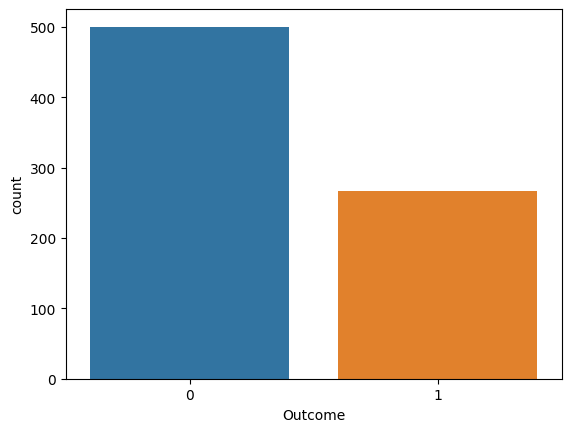

In [10]:
sns.countplot(df, x='Outcome')
plt.show()

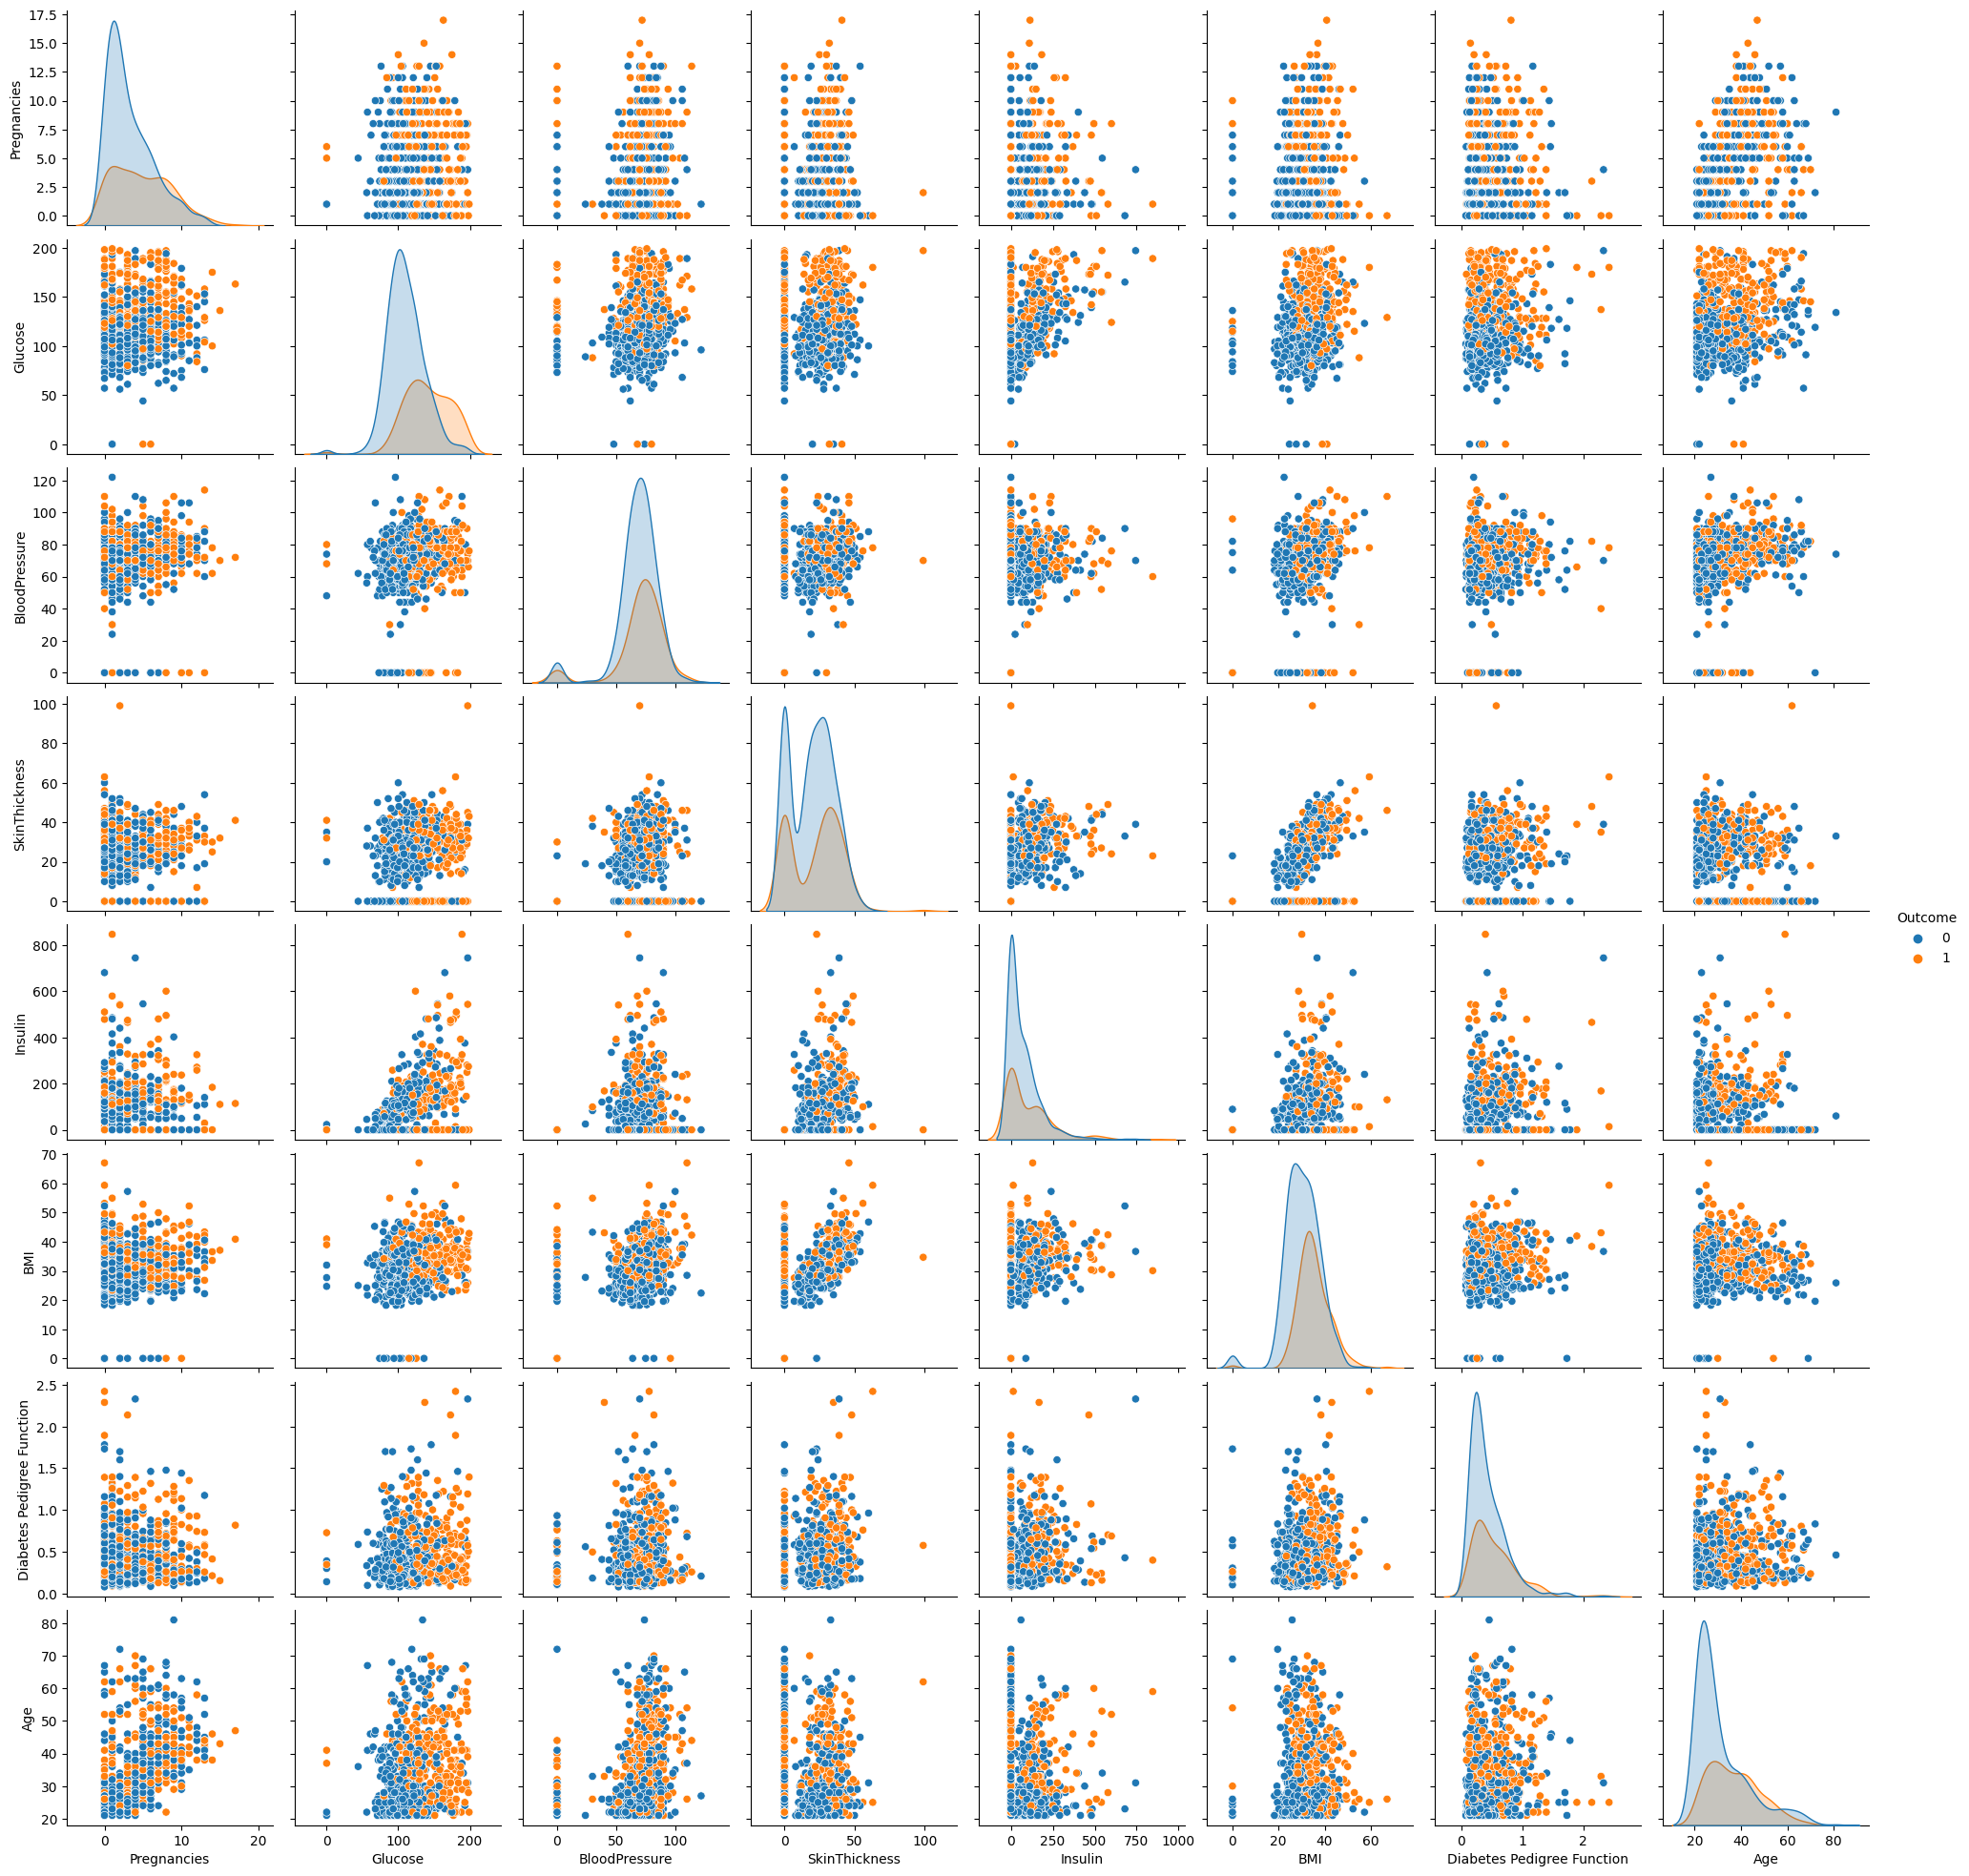

In [11]:
sns.pairplot(df, hue='Outcome')
plt.show()

In [12]:
scores = np.abs(zscore(df))
cleandf = df[(scores < 3).all(axis=1)]

In [13]:
cleandf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [14]:
print('Number of Outliers: ', len(df) - len(cleandf))

Number of Outliers:  80


In [15]:
scaler = MinMaxScaler()
features = scaler.fit_transform(cleandf.drop('Outcome', axis=1))
labels = cleandf['Outcome']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [54]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=8))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 8)                 72        
                                                                 
 dense_81 (Dense)            (None, 8)                 72        
                                                                 
 dense_82 (Dense)            (None, 8)                 72        
                                                                 
 dense_83 (Dense)            (None, 4)                 36        
                                                                 
 dropout_13 (Dropout)        (None, 4)                 0         
                                                                 
 dense_84 (Dense)            (None, 1)                 5         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable

In [55]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
18/18 [==============================] - 3s 23ms/step - loss: 0.6963 - accuracy: 0.5410 - val_loss: 0.6898 - val_accuracy: 0.6667
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6856 - accuracy: 0.6557 - val_loss: 0.6842 - val_accuracy: 0.6449
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.6849 - val_loss: 0.6780 - val_accuracy: 0.6449
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6695 - accuracy: 0.6867 - val_loss: 0.6712 - val_accuracy: 0.6449
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6594 - accuracy: 0.6903 - val_loss: 0.6650 - val_accuracy: 0.6449
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6508 - accuracy: 0.7049 - val_loss: 0.6587 - val_accuracy: 0.6449
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6532 - accuracy: 0.6903 - val_loss: 0.6521 - val_accuracy: 0.6449
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5507 - accuracy: 0.7104 - val_loss: 0.5360 - val_accuracy: 0.7681
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5598 - accuracy: 0.7213 - val_loss: 0.5358 - val_accuracy: 0.7609
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 0.5581 - accuracy: 0.7067 - val_loss: 0.5376 - val_accuracy: 0.7464
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 0.5489 - accuracy: 0.7286 - val_loss: 0.5355 - val_accuracy: 0.7754
Epoch 63/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5560 - accuracy: 0.7304 - val_loss: 0.5367 - val_accuracy: 0.7681
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5594 - accuracy: 0.7013 - val_loss: 0.5376 - val_accuracy: 0.7464
Epoch 65/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5378 - accuracy: 0.7359 - val_loss: 0.5332 - val_accuracy: 0.7754
Epoch 

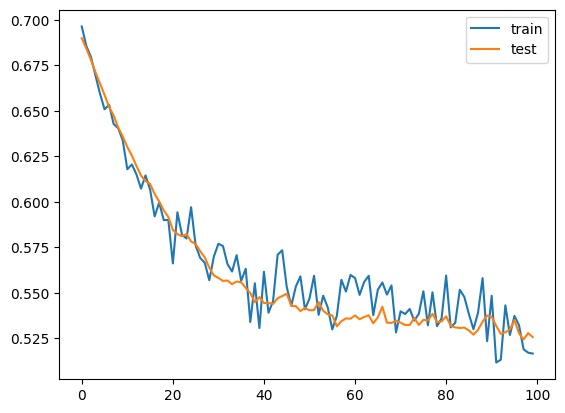

In [56]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

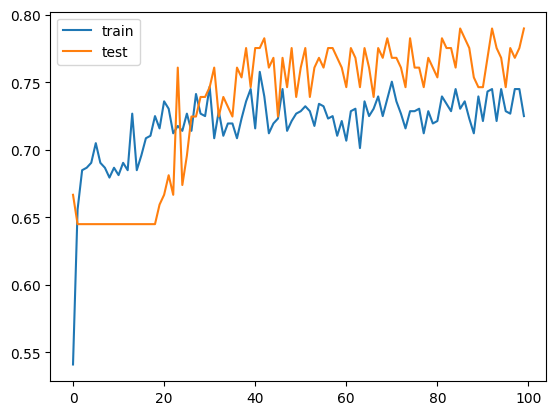

In [57]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [58]:
_, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f} %')

Accuracy: 78.99 %


In [59]:
y_pred = model.predict(x_test, verbose=False)
y_pred_binary = np.round(y_pred)
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        89
           1       0.92      0.45      0.60        49

    accuracy                           0.79       138
   macro avg       0.84      0.71      0.73       138
weighted avg       0.82      0.79      0.77       138



In [60]:
model.save('model.h5')